# To - do

<div>
  <input type="checkbox" name="uchk">
  <label for="uchk">Effect of scalling on visualization / EDA.</label>
</div>
<!-- <div>
  <input type="checkbox" name="chk" checked>
  <label for="chk">Checked.</label>
</div> -->
<div>
  <input type="checkbox" name="uchk">
  <label for="uchk">Pipeline scaler</label>
</div>
<div>
  <input type="checkbox" name="uchk">
  <label for="uchk">Linear Regression vs Gradient Descent Regression (SGD)</label>
</div>
<div>
  <input type="checkbox" name="uchk">
  <label for="uchk">Hyperparameter Tuning</label>
</div>
<div>
  <input type="checkbox" name="uchk">
  <label for="uchk">Plotting Y_Pred vs Y_Test</label>
</div>
<div>
  <input type="checkbox" name="uchk">
  <label for="uchk">Further Analysis on EDA</label>
</div>


# Import Libraries


In [65]:
# for data analysis and wrangling
import pandas as pd
import numpy as np

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns
from joypy import joyplot

# for machine learning
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Data

In [2]:
df = pd.read_excel('data/HARGA_RUMAH_JAKSEL.xlsx')
df.columns = df.iloc[0] # set first row as column header
df = df.iloc[1:] # drop the first row which has become the header
df.head()

,HARGA,LT,LB,JKT,JKM,GRS,KOTA
1,28000000000,1100,700,5,6,ADA,JAKSEL
2,19000000000,824,800,4,4,ADA,JAKSEL
3,4700000000,500,400,4,3,ADA,JAKSEL
4,4900000000,251,300,5,4,ADA,JAKSEL
5,28000000000,1340,575,4,5,ADA,JAKSEL


- HARGA : house price.
- LT : jumlah luas tanah.
- LB : jumlah luas bangunan.
- JKT : jumlah kamar tidur.
- JKM : jumlah kamar mandi.
- GRS : ada/tidak ada
- KOTA : nama kota.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 1 to 1001
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   HARGA   1001 non-null   object
 1   LT      1001 non-null   object
 2   LB      1001 non-null   object
 3   JKT     1001 non-null   object
 4   JKM     1001 non-null   object
 5   GRS     1001 non-null   object
 6   KOTA    1001 non-null   object
dtypes: object(7)
memory usage: 54.9+ KB


In [4]:
# correcting data types from string (object) to integer types
df[df.columns[:-2]]=df[df.columns[:-2]].astype('int64')
df.dtypes

0
HARGA     int64
LT        int64
LB        int64
JKT       int64
JKM       int64
GRS      object
KOTA     object
dtype: object

## EDA

In [5]:
df.value_counts('KOTA')

KOTA
JAKSEL    1001
dtype: int64

Since house only located in Jakarta Selatan City, we can drop the City columns 

In [6]:
df.drop(columns = 'KOTA',inplace = True)
df.columns

Index(['HARGA', 'LT', 'LB', 'JKT', 'JKM', 'GRS'], dtype='object', name=0)

In [7]:
# get descriptive statistics of the data
df.describe()

,HARGA,LT,LB,JKT,JKM
count,1.001000e+03,1001.000000,1001.000000,1001.000000,1001.000000
mean,1.747472e+10,530.504496,487.275724,4.457542,3.940060
std,2.079548e+10,531.069773,452.872262,2.004606,1.903261
min,4.300000e+08,22.000000,38.000000,1.000000,1.000000
25%,6.750000e+09,220.000000,300.000000,4.000000,3.000000
50%,1.350000e+10,400.000000,411.000000,4.000000,4.000000
75%,2.000000e+10,677.000000,600.000000,5.000000,4.000000
max,2.500000e+11,6790.000000,10000.000000,27.000000,27.000000


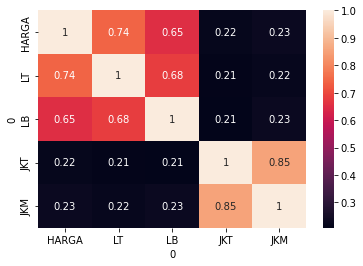

In [8]:
# checking correlation
sns.heatmap(df.corr(), annot = True)
plt.show()

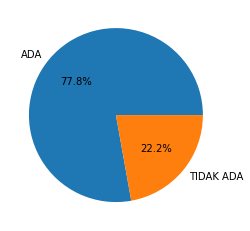

In [9]:
# creating pie chart
plt.pie(df['GRS'].value_counts(),
        labels = df['GRS'].unique(),
        autopct='%1.1f%%')
plt.show()

77% house in Jakarta Selatan has a garage.

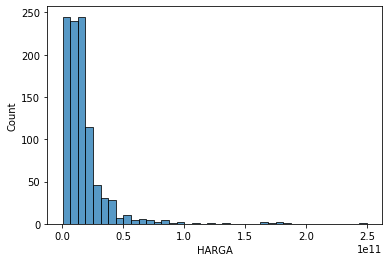

In [10]:
# creating histogram
sns.histplot(data = df, x = 'HARGA', bins = 40)
plt.show()

https://dfrieds.com/data-visualizations/how-format-large-tick-values.html

https://stackoverflow.com/questions/50335690/change-scientific-notation-abbreviation-of-y-axis-units-to-a-string

Since price is our main point of interest, we will focusing check on Price (Harga) columns

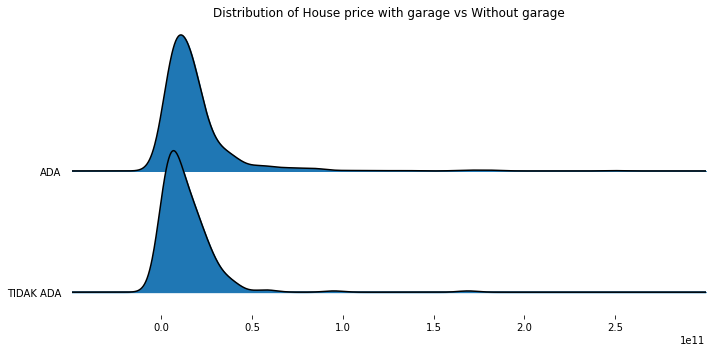

In [11]:
joyplot(data = df, 
        by = 'GRS', 
        column= 'HARGA',
        figsize= (10,5),
        title= 'Distribution of House price with garage vs Without garage')
plt.show()

# Preprocessing

perform feature scalling on columns

In [12]:
pd.concat([df.max(),df.min()], axis = 1).rename(columns={0: 'maximum_value',1:'minimum_value'})

,maximum_value,minimum_value
0,,
HARGA,250000000000,430000000
LT,6790,22
LB,10000,38
JKT,27,1
JKM,27,1
GRS,TIDAK ADA,ADA


since our range various range of values, we will perform feature scalling on whole columns (except ordinal ones)

In [14]:
# feature scaling  
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df.iloc[:,:-1])
print(scaled_data.shape)
print(scaled_data)

(1001, 5)
[[0.11047001 0.15927896 0.06645252 0.15384615 0.19230769]
 [0.07440798 0.11849882 0.07649066 0.11538462 0.11538462]
 [0.01710943 0.07062648 0.03633808 0.11538462 0.07692308]
 ...
 [0.1144769  0.09899527 0.03633808 0.11538462 0.07692308]
 [0.00508875 0.01182033 0.01023891 0.11538462 0.07692308]
 [0.00328565 0.00605792 0.00722746 0.07692308 0.07692308]]


In [15]:
print('maximum value', np.max(scaled_data))
print('minimum value', np.min(scaled_data))

maximum value 1.0000000000000002
minimum value 0.0


next we'll see the scatter plot between price and other features before and after scaling

In [16]:
# split data to train and test for modelling
x_train, x_test, y_train, y_test= train_test_split(scaled_data[:,1:5], scaled_data[:,1], random_state= 42)

In [17]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(750, 4)
(251, 4)
(750,)
(251,)


# Modelling

In [64]:
model = SGDRegressor()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print('MAE:', mean_absolute_error(y_pred, y_test))
print('MSE:', mean_squared_error(y_pred, y_test))

MAE: 0.040714961398223636
MSE: 0.003109271775992486


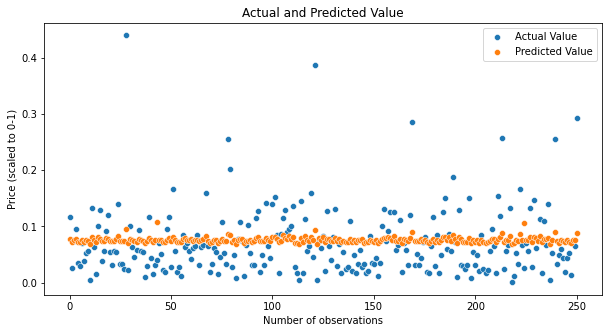

In [54]:
fig, ax = plt.subplots()
fig.set_size_inches(10,5)
ax1 = sns.scatterplot(x = range(len(y_test)), y = y_test, label = 'Actual Value')
ax2 = sns.scatterplot(x = range(len(y_pred)), y = y_pred, label = 'Predicted Value')

plt.title('Actual and Predicted Value')
plt.xlabel('Number of observations')
plt.ylabel('Price (scaled to 0-1)')
plt.legend()
plt.show()

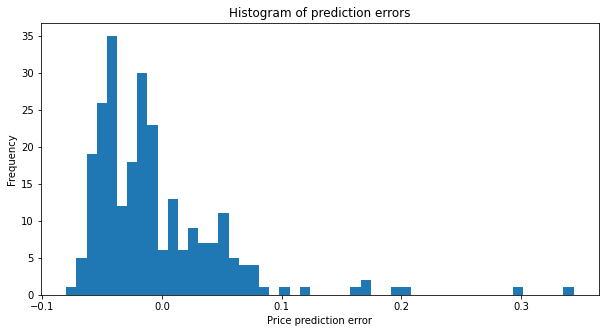

In [62]:
plt.figure(figsize= (10,5))
diff = y_test - y_pred
plt.hist(diff, bins = 50)

plt.title('Histogram of prediction errors')
plt.xlabel('Price prediction error')
plt.ylabel('Frequency')
plt.show()

In [26]:
print(df.columns)

Index(['HARGA', 'LT', 'LB', 'JKT', 'JKM', 'GRS'], dtype='object', name=0)


In [27]:
print('coefficient (w)',model.coef_)
print('intercept (b)',model.intercept_)

coefficient (w) [0.05432962 0.02370506 0.01915943 0.0177133 ]
intercept (b) [0.06686052]


Model Interpretablity:
- base price of a house is 0.06, assuming it has no other variables like LT, LB, etc.
- for every additional Luas Tanah (LT), the price will increase by 0,05
- for every additional Luas Bangunan (LB), the price will increase by 0,02
- for every additional Jumlah Kamar Tidur (JLT), the price will increase by 0,01
- for every additional Jumlah Kamar Mandi (JKM), the price will increase by 0,01

or in mathematical model for house price in jakarta selatan:

$$ y = 0.05(x_1) + 0.02(x_2) + 0.01(x_3) + 0.01(x_4) + 0.06 $$